# Challenge 2: Which students to select for the surprise test?

In order to choose 1120 students across various schools in the country, the agency has two options.

__Option 1:__ To choose 1120 students in a random manner. For example: Conducting a lottery and randomly picking the registration numbers of 1120 students from the entire country. This kind of sampling technique is called __simple random sampling__.

__Option 2:__ To choose 1120 students from various schools in various states considering factors like population of states, no. of schools in each state  etc. This kind of sampling falls under __stratified sampling__.

From a population of size N , we create all possible samples of size n. If each of them has an equal probability of getting selected during selection, then the process is called __random sampling__.

## Simple random sampling in Python
There are various ways to get a simple random sample. One commonly used method is called lottery method.

Each of the N observations (population) is assigned a unique number (S1,S2, …,S25). The numbers are then kept in a bowl and thoroughly shuffled and a blind-folded person selects n numbers.

Let us see how to generate sample in Python.

In [1]:
# Generating 25 states
states = ['s'+str(i) for i in range(1,26)]
print(states)

['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21', 's22', 's23', 's24', 's25']


[Numpy random choice](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.choice.html)

use choice() function to select n objects randomly among N given observations, as shown below.

In [2]:
import numpy as np
np.random.choice(states, size = 8, replace = False, p = None)

array(['s15', 's12', 's6', 's13', 's24', 's1', 's17', 's8'], dtype='<U3')

choice() function takes the list "states" as input. The size parameter 8 suggests we want to generate sample of size 8 and the replace=False suggests that we want to generate samples without replacement.

### Drawbacks of simple random sampling
In simple random sampling, we perform the selection completely based on chance. By doing so, we may select a sample __that may not represent the behavior of the entire population__.

For example, the 1120 students picked by the agency may coincidentally all be high performers. Then the performance of these students may not represent the actual quality of primary education. It may give a biased result and such a sample is called a __biased sample__.

Bias refers to the tendency of a statistic to systematically overestimate or underestimate a population parameter.

To avoid such problems, the agency decides to use __stratified sampling__. 

## Stratified sampling

In stratified sampling:
- we divide the population into groups based on certain characteristics. These groups are called __Strata__.
- we choose samples randomly from each of these groups.

To implement stratified sampling, the agency:
- selects 8 states among the 16 states in the country based on their population

| Population range  | Total number of states | Number of states selected |
|-------------------|------------------------|---------------------------|
| High Population   | 6                      | 3                         |
| Medium Population | 6                      | 3                         |
| Low Population    | 4                      | 2                         |

- selects 7 schools from each of the 8 states including all regions (urban, semi-urban and rural)

Total schools = 7*8 = 56 schools

- selects 20 students from each school including high, average as well as low performers

Total students = 56*20 = 1120 students

__Solution to Challenge 2__: The agency uses the __stratified sampling__ technique to identify 1120 students from the country who are going to appear for the surprise test. 

#### Stratified sampling in Python

Stratified sampling can be performed in Python using the sample() function, available in Python. 

Let us understand it using an example. 

In [3]:
import pandas as pd
df = pd.read_csv('students_mark.csv')
df = df.loc[(df['stateID'].isin(['ST1', 'ST2'])) & (df['SchoolID'].isin(['ST1S1', 'ST1S2', 'ST2S1', 'ST2S2'])),
            ['stateID','SchoolID']]
df.head()

,stateID,SchoolID
0,ST1,ST1S1
1,ST1,ST1S1
2,ST1,ST1S1
3,ST1,ST1S1
4,ST1,ST1S1


In [4]:
df['stateID'].unique()

array(['ST1', 'ST2'], dtype=object)

In [5]:
df['SchoolID'].unique()

array(['ST1S1', 'ST1S2', 'ST2S1', 'ST2S2'], dtype=object)

We can sample the data by grouping it based on department and job level. There are two stateID and 4 SchoolID.

Therefore, we can create strata corresponding to the unique combination of stateID and SchoolID. 

In [6]:
pd.crosstab(df['stateID'], df['SchoolID'])

SchoolID,ST1S1,ST1S2,ST2S1,ST2S2
stateID,,,,
ST1,20,20,0,0
ST2,0,0,20,20


output of crosstab() function shows that there are 40 unique combinations of SchoolID and stateID.

In [7]:
(df.groupby(['stateID', 'SchoolID'], group_keys = False).
apply(lambda x:x.sample(min(len(x),1))))

,stateID,SchoolID
8,ST1,ST1S1
37,ST1,ST1S2
147,ST2,ST2S1
179,ST2,ST2S2


You can see that in output sample we have all combination of "stateID" and "SchoolID".

***
## Challenge 3: Estimating population parameters

The agency selected 1120 students to appear for the surprise test. The papers are evaluated. The sample data containing the marks scored (out of 600) by the students, from a particular school of a particular state is given below. 

In [8]:
df = pd.read_csv('students_mark.csv')
df.head(10)

,studentID,stateID,SchoolID,Mark
0,1000,ST1,ST1S1,467
1,1001,ST1,ST1S1,366
2,1002,ST1,ST1S1,412
3,1003,ST1,ST1S1,532
4,1004,ST1,ST1S1,474
5,1005,ST1,ST1S1,293
6,1006,ST1,ST1S1,416
7,1007,ST1,ST1S1,495
8,1008,ST1,ST1S1,459
9,1009,ST1,ST1S1,391


In [9]:
df.shape 

(1120, 4)

In [10]:
df.shape[0]  # total rows i.e, total number of students

1120

- Each student is assigned a student ID starting from 1000 to 2119
- Each state is assigned a state ID starting from ST1 to ST8
- Each school is assigned a schoolID which contains the state ID followed by the school number from S1 to S7

For example, the 3rd school from the 2nd state will have schoolID as ST2S3.

Now that the surveying agency has collected the sample data, the next step is to calculate sample statistics like sample mean, sample variance, etc. and estimate the population parameters from them.

The following table contains various population parameters/sample statistics and the notations used to represent them.

![](3_not.PNG)

#### Finding the probability distribution

In inferential statistics, the analysis depends on the model that the data follows i.e. we must have a knowledge of the underlying probability distribution of the attribute that is being analyzed. 

The agency is analyzing the marks of the students i.e. the agency wants to know what is the probability distribution of the marks

- Marks are quantitative in nature and can have any value between 0 and 600. Thus, marks is a random variable of continuous data type.
- As each random variable has a probability distribution, we need to find the probability distribution of marks.

For doing so, the sample data is imported into Python environment and a histogram of the marks scored is plotted. This will help us understand the underlying probability distribution of the random variable mark.

Plotting the distribution of marks.

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

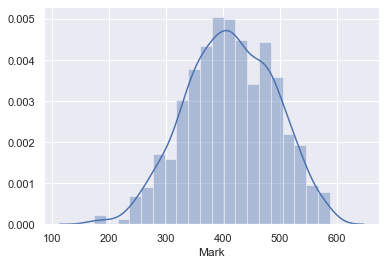

In [12]:
sns.distplot(df['Mark']);

The histogram of mark is shown above. It can be observed that the probability distribution of marks (a random variable) has a close resemblance to a normal distribution.  

 calculated the standard deviation, variance and the mean.

In [13]:
sample_mean = df['Mark'].mean()
sample_mean

413.2758928571429

In [14]:
sample_variance = np.var(df['Mark'])
sample_variance

5951.426561702816

In [15]:
sample_std = np.std(df['Mark'])
sample_std

77.14548957458767

The agency has done the followings till now.
1. Collected the sample
2. Calculated the statistics and
3. Observed the probability distribution

It now wants to estimate the value of the population parameters.

# Introduction to parameter estimation

## Parameter estimation techniques

Parameters are descriptive measures of an entire population. Estimating the population parameter and error associated with it is one of the goal.

Parameter estimation includes two major techniques:

- __Point estimation:__ This involves finding a single, most likely value of a parameter. Single value is calculated which may be the best estimate of the parameter. 
- __Interval estimation (confidence interval):__ This involves finding an interval in which the parameter may lie. A confidence level is associated with every confidence interval which suggests the degrees of certainty with which the population parameter lies in the confidence interval.

### Parameters to be estimated by the agency

The surveying agency has to find out the point estimates as well as the confidence interval for various population parameters:  
1. Estimating the population mean: This includes
    - finding the point estimate for the population mean
    - finding the confidence interval for the population mean

2. Estimating the population variance/standard deviation: This includes 
    - finding the point estimate for the standard deviation and population variance
    - finding the confidence interval for the standard deviation and population variance
    
#### Challenge 3.1: Estimating population mean

Surveying agency starts with estimating the population mean. 

As already discussed, estimating population mean includes
- finding the __point estimate of population mean__ i.e. finding the mean marks scored in the surprise test, considering all the students in the country would have appeared for the surprise test
- finding the __confidence interval of population mean with 95% confidence level__ i.e. finding an interval such that mean marks scored by all the students in the country falls in the interval with 95% probability. 

Let us first find out how the surveying agency finds the point estimate of population mean. 

Point estimate of population mean needs to be calculated in order to estimate population mean.

It can be done in two steps:

__Step 1:__ The agency has to identify a sample statistic that closely represents the population mean. The sample statistic is called __estimator__ of the population parameter and its value  is called the __estimate__ of population mean.

__Step 2:__ After finding the estimator, the agency has to check the quality of the estimator. One of the commonly used measure of the quality is the __unbiasedness of the estimator__. 

Assume that we calculate the expected value of the estimator. Bias of this estimator is the different between this calculated value and the actual value of the parameter (being estimated). Hence, when this difference is zero, estimator is said to be unbiased. 

Once the agency figures out the estimator and verifies its unbiasedness, the estimator is the unbiased estimator of the population parameter. 

While performing step 1, there are various methods to find out a sample statistic that closely represents the population parameter. One such method is method of __maximum likelihood estimation (MLE)__. 

The surveying agency decides to use method of maximum likelihood estimation.

##### Maximum Likelihood Estimation

In statistics, maximum likelihood estimation (MLE) is one of the methods of estimating the (population) parameters of a statistical model from given data.

> Maximum likelihood estimation deals with finding the likelihood function depending on the model that the data follows and finding the condition under which the likelihood function attains the maximum.

The surveying agency is analyzing the attribute mark which is normally distributed.Thus, the agency has to find the condition in which the likelihood function for normally distributed data attains the maximum.

First, let us try to find out the likelihood function for the normally distributed variable. 

##### Likelihood function for a normally distributed variable

The probability density function (PDF) for a given data model denoted as f(x|θ), specifies the probability of observing a data vector x, given the population parameter θ.

On the other hand, the likelihood function for a given data model, denoted as L(θ|x) gives the likelihood of observing population parameter θ, given the data vector x. 

In other words, we use probability density function to calculate the probability of occurrence of the observed data vector x when __population parameter θ is known__ and we use __likelihood function__ to find out the likelihood of the unknown population parameter θ when series of observations x or sample is given. 

![](3_like.PNG)

##### Maximum likelihood estimate of population mean

Method of maximum likelihood estimation deals with finding the condition in which likelihood function L(θ|x) attains maximum value. The value of population parameter θ in that condition is called __maximum likelihood estimate__ of θ.

The surveying agency is dealing with the marks scored by students in the surprise test which is normally distributed. It finds the maximum likelihood estimate of population mean μ by finding the condition under which the likelihood function for normal distribution attains maximum value and by finding the value of μ under that condition. 

##### Maximum likelihood estimator of population mean

By maximizing the likelihood function and solving for μ, we found that the function equation attains a maximum when the following condition is satisfied.

$$ \mu = \frac{x_1 + x_2 + x_3 + .... + x_n}{n} $$

The quantity  

$$ \frac{x_1 + x_2 + x_3 + .... + x_n}{n} $$

 is nothing but the sample mean ( X ). Hence we can conclude that the sample mean ( X ) is the maximum likelihood estimator of the population mean.
 
##### Unbiased estimator of population mean

As already discussed, finding point estimator of population mean involves two steps i.e. 
- finding the maximum likelihood estimator of population mean
- verifying the unbiasedness of the maximum likelihood estimator

The surveying agency has found that sample mean is the maximum likelihood estimator of population mean.

Now the agency has to verify whether sample mean is the unbiased estimator of population mean. The same can be verified by finding the expected value of sample mean. If the expected value of sample mean is equal to the parameter being estimated i.e. population mean, then the agency would conclude that sample mean is an unbiased estimator of population mean.

![](3_unbias.PNG)

##### Point estimate of population mean

The surveying agency found that the best estimation of population mean is got from the sample mean ( X ). It also verified that this estimator is unbiased.

The surveying agency has already calculated the sample mean i.e. the mean marks scored by the 1120 students in the surprise test, to be 413.2759. The population mean value can be estimated by this value.

Basically, if in this country all students had taken this surprise test, the mean marks scored would be around 413.2759.

##### Interval estimate of population mean

The surveying agency has found that sample mean is the point estimator of population mean. The sample mean was calculated to be 413.2759, which is used to estimate the population mean.

However, the sample mean may have a different value if the agency would have chosen a different sample. This suggests the sample mean varies as the sample changes. 

If the agency would have chosen multiple samples of 1120 students across the country and then for each samples, if they would have calculated the sample mean, it would have found a range of values for the sample mean.  

Thus, instead of specifying a single value of sample mean as the point estimate of population mean, the agency may choose to specify this range of values of sample mean for estimating population mean.

This kind of estimation technique is called __interval estimation__ and the range/interval is called the __confidence interval__.

##### Confidence interval

In statistics, a confidence interval (CI) is a type of interval estimate of a population parameter. It is an observed interval, that frequently includes the unknown value of the parameter of interest, if the experiment is repeated. How frequently the observed interval contains the parameter is determined by the confidence level associated with the confidence interval. 

Recall, that the surveying agency decided to set the confidence level at 95%.

This means that we need to find a __range of sample means__ such that the population mean falls within the range with 95% probability. 

##### Confidence interval of population mean

As discussed, confidence interval of population mean is nothing but a range of values of sample mean, within which the population mean is expected to lie. The range is identified by analyzing multiple samples. 

From a population of size N, if all possible samples of size n are selected:
- sample mean is calculated for each sample
- the frequency distribution of the sample means is plotted

The resulting distribution is called sampling distribution of sample mean for sample size or sampling distribution of mean. Note that - 
- each point on the sampling distribution of mean curve represents a sample mean
- the area under the sampling distribution curve represents the probability of finding a particular sample mean 

__Therefore, finding the confidence interval for population mean with a confidence level of 95% is about finding the interval under which 95% of the total area under the sampling distribution of mean curve lies.__

Thus, in order to find the confidence interval of population mean, one must plot the sampling distribution of mean, which is the frequency distribution of all possible sample means of a particular sample size.  

However, the surveying agency has only one sample and hence only one sample mean. Moreover, it is not feasible for the surveying agency to analyze all possible samples because of the huge population size and the complexity involved in conducting surprise test.

The question that arises at this point is, how would the agency plot the sampling distribution of mean, by analyzing only one sample. We need to understand some of the properties of sampling distribution of mean to find the answer to this question. 

##### Sampling distribution of mean

Let us consider a simple example to understand sampling distribution of sample mean.

A die (having six faces marked from 1 to 6) is thrown 4 times and the observed outputs are 2,5,3 and 6.

If we consider the set of these 4 numbers as our population and calculate the mean,

The population mean (μ) = (2+5+3+6)/4 = 4.

Now, let's choose all possible samples of size 2 and calculate the sample means for each of the samples. 

The samples and the sample means are listed in the table below. 

![](3_sm.PNG)

##### Sampling distribution of mean

Let us plot the frequency distribution of all the sample means above.


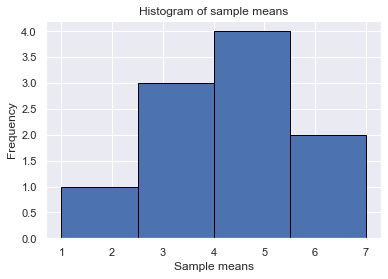

In [16]:
sample_means = pd.Series([2,4,3.5,2.5,3,4,4.5,5,5.5,6])
sample_means.plot(kind = 'hist', bins = np.arange(1,8,1.5), edgecolor = 'black', linewidth = 1);
plt.title('Histogram of sample means');
plt.xlabel('Sample means');
plt.ylabel('Frequency');

In [17]:
mean_of_sample_means = sample_means.mean()
print(mean_of_sample_means)

4.0


The histogram represents the sampling distribution of sample mean for sample size 2. Here we can observe that the mean of sampling distribution of mean denoted as $\mu_{\bar{x}}$, is equal to the population mean μ.

##### Sampling distribution of sample mean: Dice Output

Now let us understand some more properties of sampling distribution of sample mean.

Let us assume the dice was thrown a 1000 times and the outputs were noted. Here, we can consider these thousand numbers ranging from 1 to 6 as our population.

In [18]:
dice_output = pd.read_excel('data/dice.xlsx')
dice_output.head()

,Output
0,1
1,6
2,2
3,6
4,4


In [19]:
n = len(dice_output.Output)
n

1000

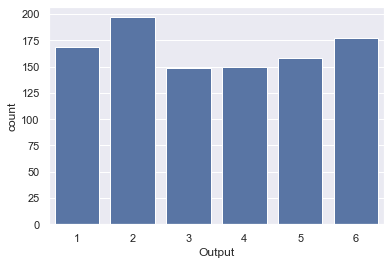

In [20]:
sns.countplot(data = dice_output, x = 'Output', color = 'b');

In [21]:
dice_population_mean = dice_output['Output'].mean()
print('Population Mean: ', dice_population_mean)
dice_population_variance = dice_output['Output'].var()
print('Population Variance: ', dice_population_variance)
dice_population_std = dice_output['Output'].std()
print('Population std deviation: ', dice_population_std)

Population Mean:  3.462
Population Variance:  3.037593593593591
Population std deviation:  1.742869356433118


##### Selecting samples of sample size 3

Let us pick samples of sample size 3 from the population. The below Python code was used to pick 1000 samples of sample size 3 from the population i.e. dice_output dataframe.

In [22]:
sample_3 = []
def gensample(n):
    return(np.random.choice(dice_output['Output'], size = n, replace = True))

function gensample() is defined, whose functionality is to choose n samples from the dataframe dice_output with replacements.

In [23]:
for i in range(1, 1001):
    x = gensample(3).tolist()
    sample_3.append(x)

In [24]:
sample_3[1:5]

[[4, 1, 2], [3, 1, 4], [1, 1, 5], [2, 1, 6]]

In [25]:
df_sample_3 = pd.DataFrame(sample_3).T
df_sample_3.shape

(3, 1000)

In [26]:
df_sample_3.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,3,4,3,1,2,5,3,6,5,1,...,4,6,5,1,1,2,6,4,5,3
1,5,1,1,1,1,5,4,6,2,3,...,1,5,1,1,2,5,5,3,2,2
2,4,2,4,5,6,6,1,4,4,2,...,5,5,2,1,6,4,6,1,3,3


##### Calculating sample means of each sample

In [27]:
sample_mean_3 = df_sample_3.apply(np.mean, axis = 0)
sample_mean_3.head()

0    4.000000
1    2.333333
2    2.666667
3    2.333333
4    3.000000
dtype: float64

In [28]:
sample_mean_3.describe()

count    1000.000000
mean        3.429333
std         1.029487
min         1.000000
25%         2.666667
50%         3.333333
75%         4.000000
max         6.000000
dtype: float64

describe() function shows sample_mean_3 is a vector having 1000 entries i.e. 1000 sample means.

##### Plotting sampling distribution of sample mean for n = 3

After calculating the sample means, let us plot the sampling distribution of the sample means.

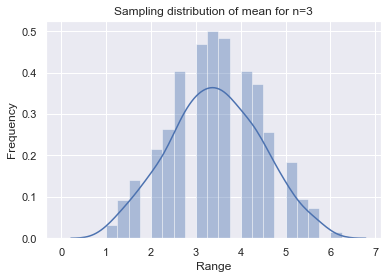

In [29]:
sns.distplot(sample_mean_3, bins = np.arange(0,7,0.25));
plt.title('Sampling distribution of mean for n=3');
plt.xlabel('Range');
plt.ylabel('Frequency');

In [30]:
mean_of_sample_mean_3 = sample_mean_3.mean()
print('Mean of sample means or sampling distribution: ', mean_of_sample_mean_3)
print('Population Mean: ', dice_population_mean)

Mean of sample means or sampling distribution:  3.4293333333333336
Population Mean:  3.462


In [31]:
std_of_sample_mean_3 = sample_mean_3.std()
print('Std deviation of sample means or sampling distribution: ', std_of_sample_mean_3)
print('Population std deviation: ', dice_population_std)

Std deviation of sample means or sampling distribution:  1.029487175172108
Population std deviation:  1.742869356433118


The mean of the sampling distribution represented $\mu_{\bar{X}}$ as was calculated to be 3.434667 and as we can see, it is nearly equal to the population mean(μ) which was calculated to be 3.462.

The standard deviation of the sampling distribution represented as $\sigma_{\bar{X}}$  was found to be 1.023448, which is less than the population standard deviation (σ) 1.741998.

##### Selecting samples of sample size 10

Now, let us take samples of larger size i.e. let us take 1000 samples of sample size 10, calculate the sample means and plot the sampling distribution for sample size 10.

In [32]:
sample_10 = []
for i in range(1, 1001):
    x = gensample(10).tolist()
    sample_10.append(x)

In [33]:
df_sample_10 = pd.DataFrame(sample_10).T
df_sample_10.shape

(10, 1000)

In [34]:
df_sample_10.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,2,6,2,4,1,5,5,4,6,6,...,6,6,2,1,1,2,3,6,5,2
1,5,5,2,3,1,4,2,4,1,6,...,5,5,5,2,2,2,6,6,3,6
2,6,5,4,4,2,3,2,2,5,1,...,6,2,5,2,2,5,5,6,2,3
3,4,4,1,5,3,2,2,2,3,1,...,1,2,4,1,4,4,4,1,3,2
4,6,4,1,1,3,4,6,6,2,2,...,6,3,6,2,4,3,6,1,2,1


In [35]:
sample_mean_10 = df_sample_10.apply(np.mean, axis = 0)
sample_mean_10.head()

0    3.9
1    4.7
2    2.7
3    3.2
4    3.3
dtype: float64

In [36]:
sample_mean_10.describe()

count    1000.00000
mean        3.45770
std         0.55531
min         1.80000
25%         3.10000
50%         3.40000
75%         3.90000
max         5.10000
dtype: float64

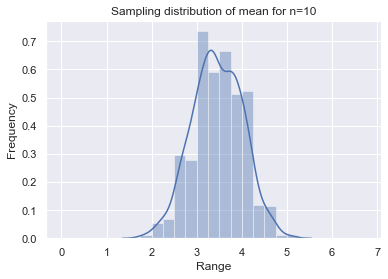

In [37]:
sns.distplot(sample_mean_10, bins = np.arange(0,7,0.25));
plt.title('Sampling distribution of mean for n=10');
plt.xlabel('Range');
plt.ylabel('Frequency');

Observe the distribution becomes more close to normal distribution.



In [38]:
mean_of_sample_mean_10 = sample_mean_10.mean()
print('Mean of sample means or sampling distribution: ', mean_of_sample_mean_10)
print('Population Mean: ', dice_population_mean)

Mean of sample means or sampling distribution:  3.4576999999999947
Population Mean:  3.462


In [39]:
std_of_sample_mean_10 = sample_mean_10.std()
print('Std deviation of sample means or sampling distribution: ', std_of_sample_mean_10)
print('Population std deviation: ', dice_population_std)

Std deviation of sample means or sampling distribution:  0.5553098946345906
Population std deviation:  1.742869356433118


The mean of the sampling distribution represented $\mu_{\bar{X}}$ as was calculated to be 3.4558 and as we can see, it is nearly equal to the population mean(μ) which was calculated to be 3.462.

The standard deviation of the sampling distribution represented as $\sigma_{\bar{X}}$  was found to be 0.5616, which is less than the population standard deviation (σ) 1.7428.

##### Comparing the sampling distributions of various sample sizes

![](3_com.PNG)

Mean of sampling distribution of mean $\mu_{\bar{X}}$ is closely equal to the population mean $\sigma$.

We can observe a decrease in the standard deviation of the sampling distribution ($\sigma_{\bar{X}}$) as the sample size increases. The standard deviation of sampling distribution of mean is called __standard error__. 

##### Standard error

The standard deviation being the square root of variance, the relationship between the population standard deviation and standard deviation of sampling distribution of sample mean (standard error - $\sigma_{\bar{X}}$) can be written as:

$$ \sigma_{\bar{X}} = \frac{\sigma}{\sqrt{n}} $$ 

where, n - Sample size

Let us calculate the standard error using the formula above:



In [40]:
print('Std deviation of sample means or sampling distribution: ', std_of_sample_mean_10)
print('Std error sampling distribution with n=10: ', dice_population_std/np.sqrt(10))

Std deviation of sample means or sampling distribution:  0.5553098946345906
Std error sampling distribution with n=10:  0.5511436830440489


In [41]:
print('Std deviation of sample means or sampling distribution: ', std_of_sample_mean_3)
print('Std error sampling distribution with n=3: ', dice_population_std/np.sqrt(3))

Std deviation of sample means or sampling distribution:  1.029487175172108
Std error sampling distribution with n=3:  1.0062460920990104


##### Application of sampling distribution of sample mean

The sampling distribution can be shown as below:

![](3_smp.PNG)

We need to find the probability of getting a sample mean that is greater than 80 which is the area enclosed under the curve to the right of point 80 on the x axis. 

To calculate the area, we need to find out how many standard deviation, the point 80 is away from the mean. This can be calculated as below:

(80 – 72)/3.95 = 2.02 which suggests 80 is 2.02 standard deviation away from the mean.

We can use the norm.cdf() function in Python to find out the probability of getting a value that is 2.02 standard deviation from mean.  

In [42]:
from scipy.stats import norm
norm.cdf(2.02)

0.9783083062323532

The output of norm.cdf() function gives the area enclosed to the left of a point which is the probability of finding a number less than 80. The same is represented in the figure below. 

![](3_mn.PNG)

norm.cdf(2.02) gives the area enclosed under the normal distribution curve to the left of the point 80. We need to find the probability that the sample mean is greater than 80. We need to find the area enclosed by the colored portion in the below diagram. 

![](3_mn2.PNG)

As we already found out the area enclosed to the left of point 80, we can calculate the area to the right as  1-0.9783= 0.0217 or 2.17%

Hence we conclude that, if we randomly choose a sample of 10 students from class 10th, the probability of sample mean being greater than 80 is 2.17%. 

##### Plotting the sampling distribution without analyzing all possible samples

In the sampling distribution of mean section, we have observed the following properties of sampling distribution of mean

- Sampling distribution of sample mean is normally distributed, irrespective of the population.
- Mean of the sampling distribution of sample mean ($\mu_{\bar{X}}$) is equal to the population mean μ.
- The standard deviation of the sampling distribution known as standard error can be found out using the formula $$ \sigma_{\bar{X}} = \frac{\sigma}{\sqrt{n}} $$ 

From the above points, it can be observed that the __mean and standard error of sampling distribution depends on population mean and population standard deviation__ respectively.

Thus, If the population parameters μ and σ are known, then the mean and standard error of sampling distribution can be calculated and the sampling distribution of mean can be plotted without analyzing all possible samples.

#### Sampling distribution of mean: Unknown Population Parameters

In order to find out the confidence interval of population mean, the surveying agency needs to plot the sampling distribution of mean. However, the population parameters μ and σ are not known to the surveying agency, hence the agency is not able to plot the sampling distribution of mean. 

When the population parameters i.e. μ and σ are unknown, sampling distribution of mean can be plotted by estimating the mean and standard error of the sampling distribution of mean. 

Before understanding how to estimate the mean and standard error of sampling distribution of mean, we need to remember the following points given in the table below. 

| Population parameter                                     | Sample size | Distribution                               |
|----------------------------------------------------------|-------------|--------------------------------------------|
| when both population mean and std  deviation is unknown. | < 30        | t-distribution with n-1 degrees of freedom |
| when both population mean and std  deviation is unknown. | > = 30      | Normal distribution                        |

While estimating the mean and standard error of sampling distribution of mean,first we find out whether the distribution is normal distribution or t distribution based on the sample size.  Once we know the distribution, we estimate the mean and standard error of the distribution. 

##### Estimating the mean of sampling distribution of mean

![](3_mna.PNG)

##### Estimating the standard error

![](3_mn_se.PNG)

##### Plotting the sampling distribution

We have discussed how to find the mean and standard error of sampling distribution of mean when the population parameters are unknown. 

The surveying agency uses the same formula and calculates the mean and standard error of the sampling distribution as shown below. 

![](3_mn_sd.PNG)

Moreover, the population parameters are unknown to the surveying agency and the agency dealing with a sample size of 1120 which is much greater than 30. So the sampling distribution of mean will have a normal distribution. 

Python function norm.pdf() can be used to plot the sampling distribution of mean as given below:

Reference:
1. [Numpy linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html)
2. [scipy.stats.norm function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)


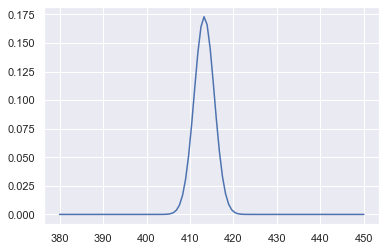

In [43]:
mu = 413.2759
sd = 2.30619
x = np.linspace(380, 450, 100)
plt.plot(x, norm.pdf(x, mu, sd));
plt.show();